## Clustering two Moons in 2D

### PACKAGES

In [39]:
print(__doc__)
import pandas as pd
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import time    
import random
from hdbscan import HDBSCAN
import sys
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import numpy as np
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics.cluster import adjusted_rand_score
import math
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
from math import pi

Automatically created module for IPython interactive environment


In [79]:
#function to get maximum value for the chosen index - in this case rand
def get_max_by_col(parameters, col):
    # col - 1 is used to 'hide' the fact lists' indexes are zero-based from the caller
    return max(parameters, key=lambda x: x[col - 1])

### DATA GENERATION FUNCTION

In [80]:
#function to generate 2 moons
def moons(N,noise):
    X, labels_true = make_moons(n_samples=N, noise=noise)
    return X,labels_true

### CLUSTERING FUNCTIONS

1.1 DBSCAN

In [81]:
#function
def dbscan(X, eps, min_samples,metric):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples,metric=metric).fit(X)
    labels=db.labels_
    y_pred1=db.fit_predict(X)
    plt.style.use('fivethirtyeight')
    plt.scatter(X[:,0], X[:,1],c=y_pred1, cmap='rainbow', alpha=0.7, 
                edgecolors='b')
    plt.title("DBSCAN")
    print('DBSCAN')
    print('Adjusted Rand Score: ',adjusted_rand_score(labels_true, y_pred1))

In [82]:
#dbscan with plot
def DBSCAN_GRID(X):
    parameters = []
    # Starting a tally of total iterations
    eps_space = np.arange(0.1, 1, 0.1)
    min_samples_space = np.arange(1,20, 1)
    metrics_space=['euclidean','manhattan','chebyshev','hamming']
    n_iterations = 0
    # Looping over each combination of hyperparameters
    for eps_val in eps_space:
        for samples_val in min_samples_space:
            for metric_val in metrics_space:
                dbscan_grid = DBSCAN(eps = eps_val,min_samples = samples_val,metric=metric_val)
                # fit_transform
                clusters = dbscan_grid.fit_predict(X = X)
                unique = np.unique(clusters)
                if (len(unique) < 10):
                        rand_score=adjusted_rand_score(labels_true, clusters)
                        # Increasing the iteration tally with each run of the loop
                        n_iterations += 1
                        # Appending the lst each time n_clusters criteria is reached
                        if rand_score>=0.05:
                            parameters.append([eps_val,samples_val,metric_val,rand_score])
    maximum_rand=get_max_by_col(parameters, 4)
    a=maximum_rand[0]
    b=maximum_rand[1]
    c=maximum_rand[2]
    rand=maximum_rand[3]
    dbscan(X, eps=a, min_samples=b,metric=c)
    print(get_max_by_col(parameters, 4))

1.2 HDBSCAN

In [83]:
def hdbscan(X,min_clust_size):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hdb = HDBSCAN(algorithm='best', alpha=1.0, leaf_size=40,metric='chebyshev',
                  min_cluster_size=min_clust_size,
                  cluster_selection_epsilon=0.5,
                  min_samples=None).fit(X)
    labels=hdb.labels_
    y_pred2 = hdb.labels_
    plt.scatter(X[:,0], X[:,1],c=y_pred2, cmap='rainbow', alpha=0.7, edgecolors='b')
    plt.title("HDBSCAN")
    print('HDBSCAN')
    print('Adjusted Rand Score: ',adjusted_rand_score(labels_true, y_pred2))

1.3 SPECTRAL

In [84]:
def spectal(X):
    t1 = time.time()
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', 
                            eigen_tol=0.0, assign_labels="discretize").fit(X)
    y_pred3 = db.fit_predict(X)
    spec_elapsed_time = time.time() - t1
    plt.scatter(X[:,0], X[:,1], c=y_pred3, cmap='rainbow', alpha=0.7, edgecolors='b')
    plt.title("SPECTRAL")
    print('Adjusted Rand Score: ',adjusted_rand_score(labels_true, y_pred3))

1.4 K-MEANS

In [85]:
def kmeans(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred4 = km.predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred4, cmap='rainbow', alpha=0.7, edgecolors='b')
    plt.title("K-means")
    print('K-means')
    print('Adjusted Rand Score: ',adjusted_rand_score(labels_true, y_pred4))

1.5 HIERARCHICAL WITH WANRD LINKAGE

In [86]:
def hier(X, n_clusters):
    t1 = time.time()
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters) #default is with ward linkage
    y_pred5 = hier.fit_predict(X)
    Hier_elapsed_time = time.time() - t1
    plt.scatter(X[:,0], X[:,1],c=y_pred5,cmap='rainbow', alpha=0.7, edgecolors='b')
    plt.title("Hierarchical")
    print('Hierarchical')
    print('Adjusted Rand Score: ',adjusted_rand_score(labels_true, y_pred5))

### CLUSTERING FUNCTIONS WITH NO PLOTTING

In [87]:
def dbscan_2(X, eps, min_samples,metric):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples,metric=metric).fit(X)
    y_pred1=db.fit_predict(X)
    db_rand2.append(adjusted_rand_score(labels_true, y_pred1))
    
#dbscan with no plot
def DBSCAN_GRID2(X):
    parameters = []
    # Starting a tally of total iterations
    eps_space = np.arange(0.1, 1, 0.1)
    min_samples_space = np.arange(1, 20, 1)
    metrics_space=['euclidean','manhattan','chebyshev','hamming']
    n_iterations = 0
    # Looping over each combination of hyperparameters
    for eps_val in eps_space:
        for samples_val in min_samples_space:
            for metric_val in metrics_space:
                dbscan_grid = DBSCAN(eps = eps_val,min_samples = samples_val,metric=metric_val)
                # fit_transform
                clusters = dbscan_grid.fit_predict(X = X)
                unique = np.unique(clusters)
                if (len(unique) < 10):
                        rand_score=adjusted_rand_score(labels_true, clusters)
                        # Increasing the iteration tally with each run of the loop
                        n_iterations += 1
                        # Appending the lst each time n_clusters criteria is reached
                        if rand_score>=0.05:
                            parameters.append([eps_val,samples_val,metric_val,rand_score])
    maximum_rand=get_max_by_col(parameters, 4)
    a=maximum_rand[0]
    b=maximum_rand[1]
    c=maximum_rand[2]
    rand=maximum_rand[3]
    dbscan_2(X,a,b,c)

In [88]:
def hdbscan_2(X,min_clust_size):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hdb = HDBSCAN(algorithm='best', alpha=1.0, leaf_size=40,metric='chebyshev',
                  min_cluster_size=min_clust_size,
                  cluster_selection_epsilon=0.5,
                  min_samples=None).fit(X)
    labels=hdb.labels_
    y_pred2 = hdb.labels_
    hdb_rand2.append(adjusted_rand_score(labels_true, y_pred2))

In [89]:
def spectral_2(X):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', 
                            eigen_tol=0.0, assign_labels="discretize").fit(X)
    y_pred3 = db.fit_predict(X)
    spec_rand2.append(adjusted_rand_score(labels_true, y_pred3))

In [90]:
def hier_2(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters) #default is with ward linkage
    y_pred5 = hier.fit_predict(X)
    h_rand2.append(adjusted_rand_score(labels_true, y_pred5))

In [91]:
def kmeans_2(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred4 = km.predict(X)
    k_rand2.append(adjusted_rand_score(labels_true, y_pred4))

### COMPARING CLUSTERING METHODS WITH HIGH NOISE

In [92]:
X,labels_true=moons(200,0.2)
X = StandardScaler().fit_transform(X)

DBSCAN
Adjusted Rand Score:  0.7475039123353902
[0.5, 8, 'manhattan', 0.7475039123353902]


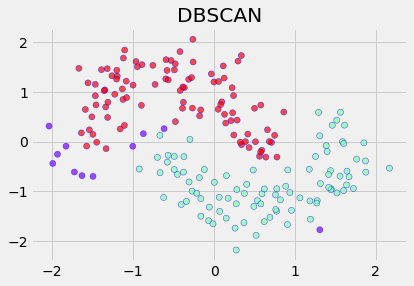

In [93]:
#DBSCAN 
DBSCAN_GRID(X)

HDBSCAN
Adjusted Rand Score:  0.5374079863103959


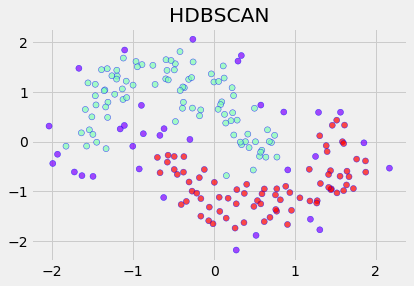

In [94]:
#HDBSCAN
hdbscan(X,5)

Adjusted Rand Score:  0.4066181818181819


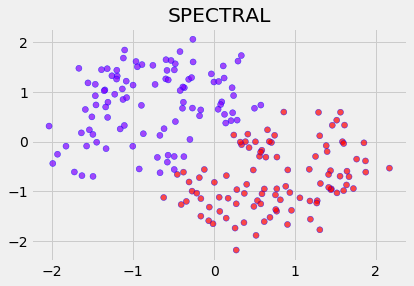

In [95]:
spectal(X)

K-means
Adjusted Rand Score:  0.4195836264729159


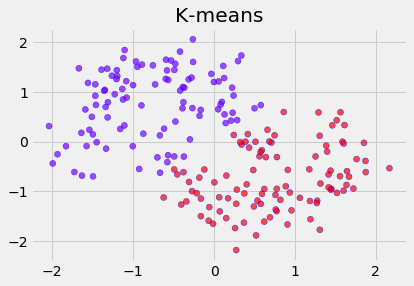

In [96]:
kmeans(X, 2)

Hierarchical
Adjusted Rand Score:  0.5305525267303991


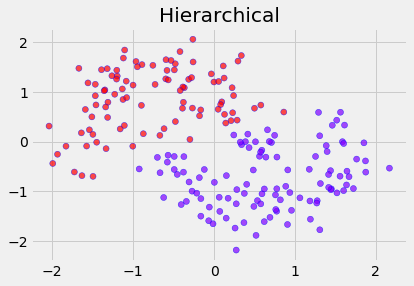

In [97]:
hier(X,2)

In [98]:
#Creation of lists to store results
k_rand2=[]
h_rand2=[]
db_rand2=[]
hdb_rand2=[]
spec_rand2=[]

for i in range(100):
    X,labels_true = moons(200,0.2)
    X = StandardScaler().fit_transform(X)
    hier_2(X,2)
    kmeans_2(X,2)
    DBSCAN_GRID2(X)
    hdbscan_2(X,5)
    spectral_2(X)

#Creation of the dataframe to compare all the results with rand score
columns=['Hierarchical Rand Score','K-means Rand Score','DBSCAN Rand Score',
         'HDBSCAN Rand Score','Spectral Rand Score']
scores= [h_rand2,k_rand2,db_rand2,hdb_rand2,spec_rand2]
a={'Hierarchical': h_rand2, 
   'K-means': k_rand2,
   'DBSCAN':db_rand2,
   'HDBSCAN ':hdb_rand2,
   'Spectral':spec_rand2}

df_high = pd.DataFrame(data=a)
df_high.loc['mean'] = df_high.mean() #mean of the scores for each clustering method
df_high.loc['Std'] = df_high.std() #standard deviation of the scores for each clustering method
df_high=df_high.round(3)

In [99]:
#save to csv
df_high.to_csv('2DMoons_HIGHnoise.csv')
df_high.to_excel('2DMoons_HIGHnoise.xls')

In [118]:
df_high.to_latex('2DMoons_HIGHnoise.tex')

### COMPARING CLUSTERING METHODS WITH MEDIUM NOISE

In [100]:
#Generation of the data
X,labels_true = moons(200,0.13)
X = StandardScaler().fit_transform(X)

DBSCAN
Adjusted Rand Score:  0.8856632188212037
[0.5, 9, 'manhattan', 0.8856632188212037]


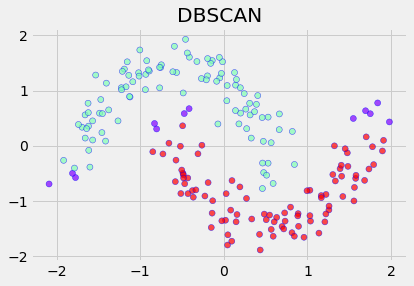

In [101]:
#DBSCAN 
DBSCAN_GRID(X)

HDBSCAN
Adjusted Rand Score:  0.663992269093009


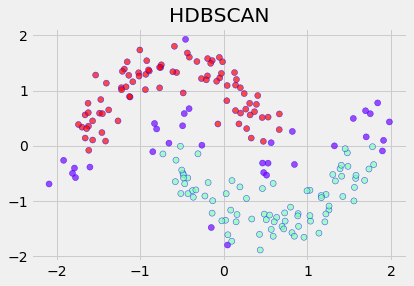

In [102]:
#HDBSCAN
hdbscan(X,10)

Adjusted Rand Score:  0.5754666666666667


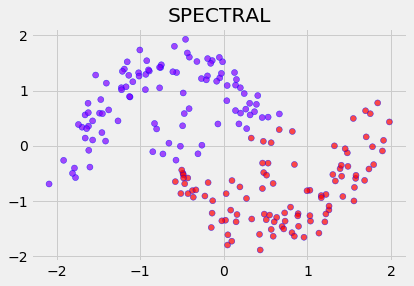

In [103]:
spectal(X)

K-means
Adjusted Rand Score:  0.5453151515151515


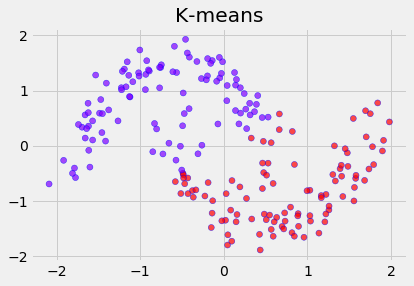

In [104]:
kmeans(X, 2)

Hierarchical
Adjusted Rand Score:  0.5161592581523275


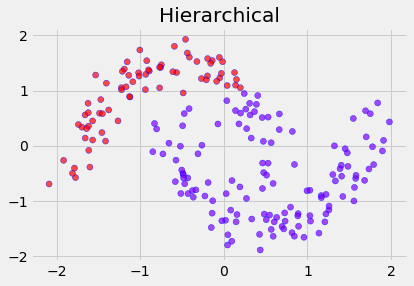

In [105]:
hier(X,2)

In [106]:
#Creation of lists to store results
k_rand2=[]
h_rand2=[]
db_rand2=[]
hdb_rand2=[]
spec_rand2=[]

for i in range(100):
    X,labels_true = moons(200,0.13)
    X = StandardScaler().fit_transform(X)
    hier_2(X,2)
    kmeans_2(X,2)
    DBSCAN_GRID2(X)
    hdbscan_2(X,10)
    spectral_2(X)

#Creation of the dataframe to compare all the results with rand score
columns=['Hierarchical Rand Score','K-means Rand Score','DBSCAN Rand Score',
         'HDBSCAN Rand Score','Spectral Rand Score']
scores= [h_rand2,k_rand2,db_rand2,hdb_rand2,spec_rand2]
a={'Hierarchical': h_rand2, 
   'K-means': k_rand2,
   'DBSCAN':db_rand2,
   'HDBSCAN ':hdb_rand2,
   'Spectral':spec_rand2}

df_medium = pd.DataFrame(data=a)
df_medium.loc['mean'] = df_medium.mean() #mean of the scores for each clustering method
df_medium.loc['Std'] = df_medium.std() #standard deviation of the scores for each clustering method
df_medium=df_medium.round(3)

In [107]:
#save to cvs
df_medium.to_csv('2dMoons_MEDIUMnoise.csv')
df_medium.to_excel('2DMoons_MEDIUMnoise.xls')

In [119]:
df_medium.to_latex('2DMoons_MEDIUMnoise.tex')

### COMPARING CLUSTERING METHODS WITH SMALL NOISE 

In [108]:
#Generation of the data
X, labels_true = moons(200,0.07)
X = StandardScaler().fit_transform(X)

DBSCAN
Adjusted Rand Score:  1.0
[0.4, 1, 'euclidean', 1.0]


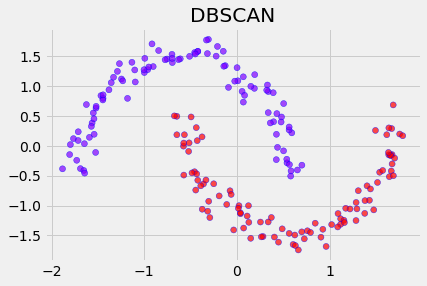

In [109]:
#DBSCAN
DBSCAN_GRID(X)

HDBSCAN
Adjusted Rand Score:  0.9238891159662439


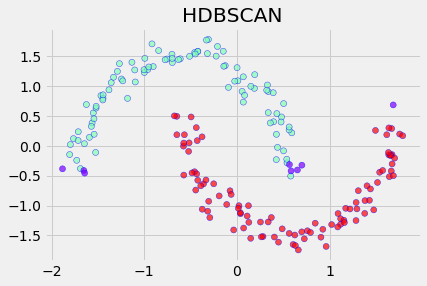

In [110]:
#HDBSCAN
hdbscan(X,10)

C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Adjusted Rand Score:  1.0


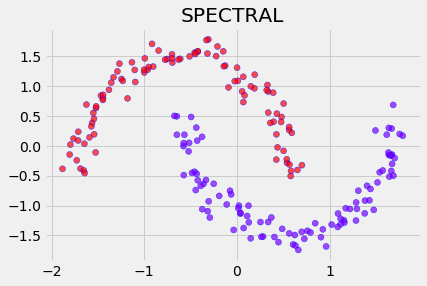

In [111]:
#Spectral
spectal(X)

K-means
Adjusted Rand Score:  0.48743356181402764


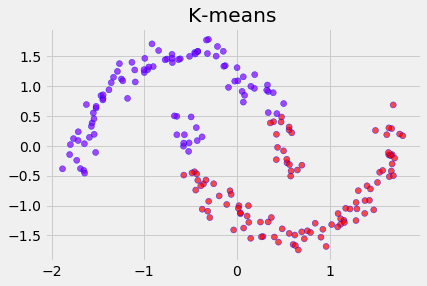

In [112]:
#K-means
kmeans(X, 2)

Hierarchical
Adjusted Rand Score:  0.6222856424402444


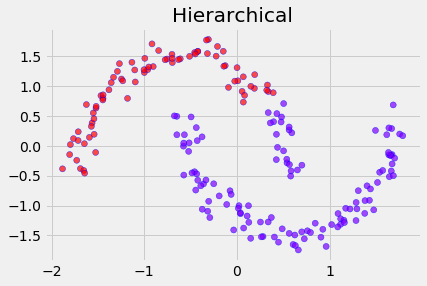

In [113]:
#Hierarchical
hier(X,2)

In [114]:
#Creation of lists to store results
k_rand2=[]
h_rand2=[]
db_rand2=[]
hdb_rand2=[]
spec_rand2=[]

for i in range(100):
    X,labels_true = moons(200,0.07)
    X = StandardScaler().fit_transform(X)
    hier_2(X,2)
    kmeans_2(X,2)
    DBSCAN_GRID2(X)
    hdbscan_2(X,10)
    spectral_2(X)

#Creation of the dataframe to compare all the results with rand score
columns=['Hierarchical Rand Score','K-means Rand Score','DBSCAN Rand Score',
         'HDBSCAN Rand Score','Spectral Rand Score']
scores= [h_rand2,k_rand2,db_rand2,hdb_rand2,spec_rand2]
a={'Hierarchical': h_rand2, 
   'K-means': k_rand2,
   'DBSCAN':db_rand2,
   'HDBSCAN ':hdb_rand2,
   'Spectral':spec_rand2}

df_small = pd.DataFrame(data=a)
df_small.loc['mean'] = df_small.mean() #mean of the scores for each clustering method
df_small.loc['Std'] = df_small.std() #standard deviation of the scores for each clustering method
df_small=df_small.round(3)

C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully

In [115]:
#save to csv
df_small.to_csv('2DMoons_SMALLnoise.csv')
df_small.to_excel('2DMoons_SMALLnoise.xls')

In [116]:
df_small.to_latex('2DMoons_SMALLnoise.tex')